# Logistic Regression Implementation on Titanic Data Set From Kaggle

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

In [4]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


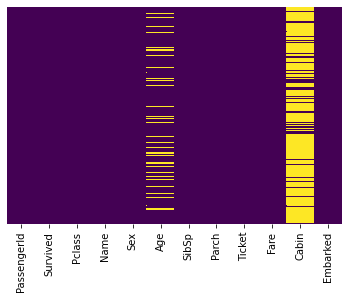

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

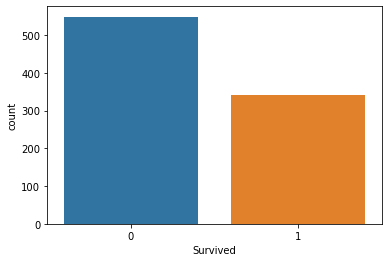

In [6]:
sns.countplot(x='Survived',data=df)

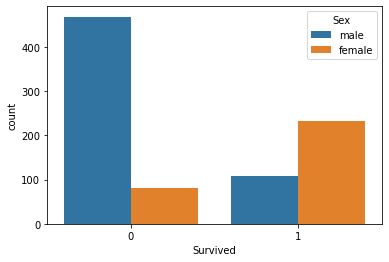

In [7]:
sns.countplot(x='Survived',hue='Sex',data=df)

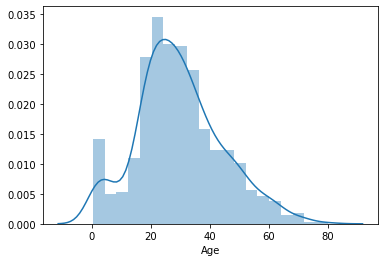

In [8]:
sns.distplot(df['Age'].dropna())

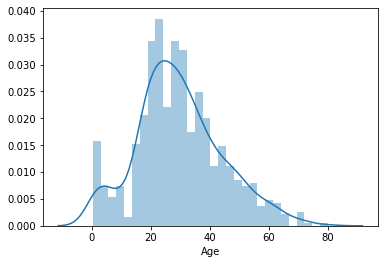

In [9]:
sns.distplot(df['Age'].dropna(),bins=30)

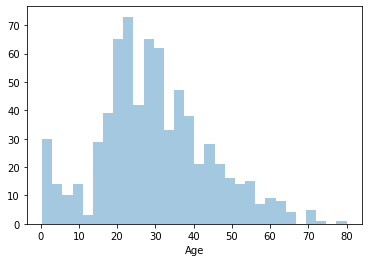

In [10]:
sns.distplot(df['Age'].dropna(),kde=False,bins=30)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


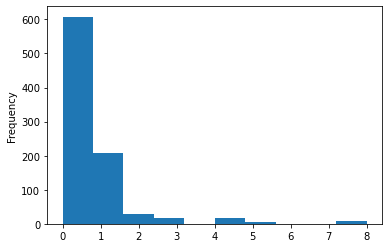

In [12]:
df['SibSp'].plot.hist()

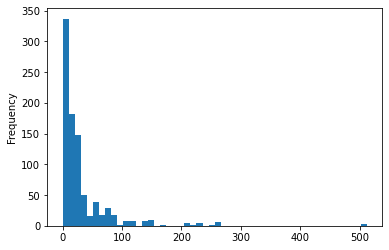

In [13]:
df['Fare'].plot.hist(bins=50)

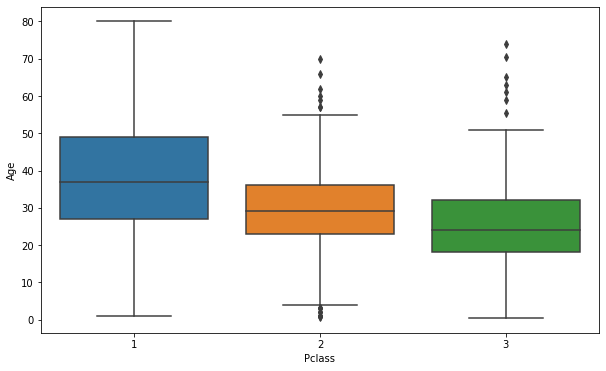

In [14]:
#Data Cleaning Part
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=df)

In [15]:
def fill_age(col):
    
    if pd.isnull(col[0]):
        if col[1] == 1:
            return 37
        elif col[1] == 2:
            return 28
        else:
            return 24
    else:
        return col[0]

In [16]:
df['Age'] = df[['Age','Pclass']].apply(fill_age,axis=1)

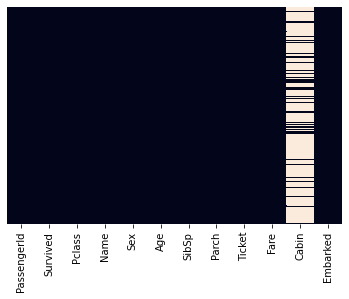

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [18]:
df.drop('Cabin',axis=1,inplace=True)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


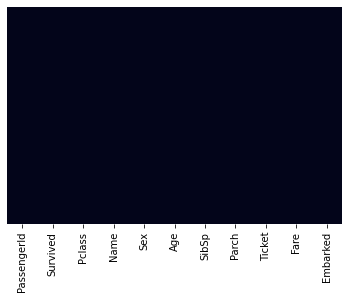

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [21]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
emb = pd.get_dummies(df['Embarked'],drop_first=True)

In [22]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [24]:
df = pd.concat([df,sex,emb],axis=1)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [26]:

from sklearn.model_selection import train_test_split
x = df.drop('Survived',axis=1)
x_train,x_test, y_train, y_test = train_test_split(x,df['Survived'],test_size=0.10,random_state=101)

In [27]:
#Apply logistic Regression
from sklearn.linear_model import LogisticRegression as LR

x = df.drop('Survived',axis=1)
y = df['Survived']
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [28]:
lr = LR(solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
pred = lr.predict(x_test)
pred[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        51
           1       0.84      0.67      0.74        39

    accuracy                           0.80        90
   macro avg       0.81      0.78      0.79        90
weighted avg       0.81      0.80      0.80        90



In [31]:
#Apply on real Test Data
test = pd.read_csv('test.csv')

In [32]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


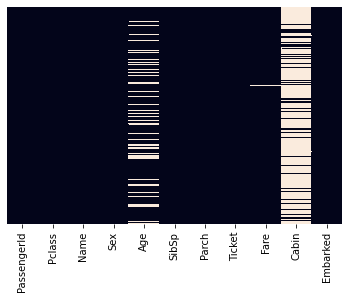

In [33]:
sns.heatmap(test.isnull(),cbar=False,yticklabels=False)

In [34]:
test = test.drop('Cabin',axis=1)

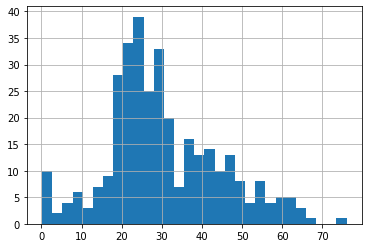

In [35]:
test['Age'].hist(bins=30)

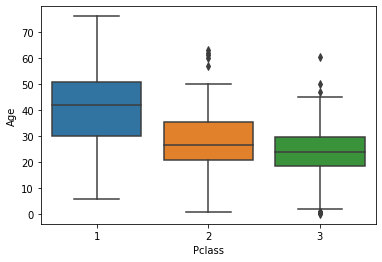

In [36]:
sns.boxplot(x='Pclass',y='Age',data=test)

In [37]:
def check1(cols):
    if pd.isnull(cols[0]):
        if cols[1] == 1:
            return 43
        elif cols[1] == 2:
            return 27
        else:
            return 24
    else:
        return cols[0]

In [38]:
test['Age'] = test[['Age','Pclass']].apply(check1,axis=1)

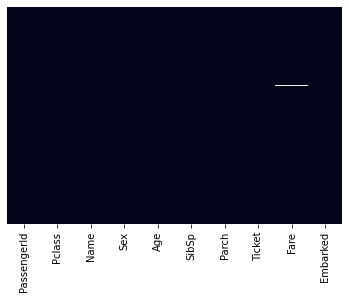

In [39]:
sns.heatmap(test.isnull(),cbar=False,yticklabels=False)

In [40]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [41]:
sex1 = pd.get_dummies(test['Sex'],drop_first=True)
Emb = pd.get_dummies(test['Embarked'],drop_first=True)

test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [42]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


In [43]:
test = pd.concat([test,sex1,Emb],axis=1)

In [44]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [45]:
missing_data = test.isnull()
missing_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [46]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

PassengerId
False    418
Name: PassengerId, dtype: int64

Pclass
False    418
Name: Pclass, dtype: int64

Age
False    418
Name: Age, dtype: int64

SibSp
False    418
Name: SibSp, dtype: int64

Parch
False    418
Name: Parch, dtype: int64

Fare
False    417
True       1
Name: Fare, dtype: int64

male
False    418
Name: male, dtype: int64

Q
False    418
Name: Q, dtype: int64

S
False    418
Name: S, dtype: int64



In [47]:
avg_fare= test['Fare'].astype('float').mean(axis=0)
avg_fare

35.627188489208635

In [48]:
test['Fare'].replace(np.nan,avg_fare,inplace=True)

In [63]:
lr1 = LR()
# lr1 = LR(solver='liblinear')
# lr1.fit(x,y)
with open('Titanic.pickle','wb') as f:
    pickle.dump(lr1,f)

In [64]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   male         891 non-null    uint8  
 7   Q            891 non-null    uint8  
 8   S            891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [65]:
pickle_file = open('Titanic.pickle','rb')
lr1 = pickle.load(pickle_file)
pred1 = lr1.predict(test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [58]:
pred1[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [59]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [60]:
data = {'PassengerId':test['PassengerId'], 'Survived':pred1} 

In [61]:
result = pd.DataFrame(data,index=None)
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [62]:
result.to_csv('result.csv')